In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup successful! Ready to start the project.")

Setup successful! Ready to start the project.


In [182]:
# Load OECD Life Expectancy Data
df_life_expectancy = pd.read_csv('../data/raw/oecd_life_expectancy.csv')


df_life_expectancy.shape
print(df_life_expectancy.columns)

# Prepare life expectancy DataFrame for Machine Learning
ml_df_life_expectancy = df_life_expectancy[['REF_AREA', 'TIME_PERIOD', "SEX", 'OBS_VALUE']]


Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
       'Frequency of observation', 'TERRITORIAL_LEVEL', 'Territorial level',
       'REF_AREA', 'Reference area', 'TERRITORIAL_TYPE',
       'Territorial typology', 'MEASURE', 'Measure', 'AGE', 'Age', 'SEX',
       'Sex', 'UNIT_MEASURE', 'Unit of measure', 'TIME_PERIOD', 'Time period',
       'OBS_VALUE', 'Observation value', 'COUNTRY', 'Country', 'OBS_STATUS',
       'Observation status', 'UNIT_MULT', 'Unit multiplier', 'DECIMALS',
       'Decimals'],
      dtype='object')


In [183]:
print(ml_df_life_expectancy.shape)

# check for missing values
print(ml_df_life_expectancy.isnull().sum())

# check data types
print(ml_df_life_expectancy.dtypes)

# noticed that countries have two rows per year for male and female
ml_df_life_expectancy.head(10)

# pivot the data to have separate columns for male and female
ml_df_life_expectancy_pivot = ml_df_life_expectancy.pivot_table(index=['REF_AREA', 'TIME_PERIOD'], columns='SEX', values='OBS_VALUE').reset_index()
ml_df_life_expectancy_pivot.columns.name = None  # remove the columns name
ml_df_life_expectancy_pivot.rename(columns={'F': 'Life_Expectancy_Female', 'M': 'Life_Expectancy_Male'}, inplace=True)

# check the pivoted data (now 1 row per year incl. male and female life expectancy)
ml_df_life_expectancy_pivot.head(10)


(2968, 4)
REF_AREA       0
TIME_PERIOD    0
SEX            0
OBS_VALUE      0
dtype: int64
REF_AREA        object
TIME_PERIOD      int64
SEX             object
OBS_VALUE      float64
dtype: object


,REF_AREA,TIME_PERIOD,Life_Expectancy_Female,Life_Expectancy_Male
0,ALB,2014,80.2,76.3
1,ALB,2015,79.7,76.2
2,ALB,2016,80.1,77.0
3,ALB,2017,80.1,77.1
4,ALB,2018,80.5,77.4
5,ALB,2019,80.7,77.6
6,ALB,2020,79.6,75.2
7,ALB,2021,77.7,73.6
8,ALB,2022,80.9,77.4
9,ARG,2000,77.0,70.1


In [184]:

# checking if data looks reasonable
print(ml_df_life_expectancy["OBS_VALUE"].describe())
print(ml_df_life_expectancy["TIME_PERIOD"].describe())

count    2968.000000
mean       77.101604
std         5.697820
min        51.100000
25%        74.100000
50%        78.200000
75%        81.040000
max        87.710000
Name: OBS_VALUE, dtype: float64
count    2968.000000
mean     2006.685984
std         9.567375
min      1990.000000
25%      1999.000000
50%      2007.000000
75%      2015.000000
max      2024.000000
Name: TIME_PERIOD, dtype: float64


In [185]:
# checking unique countries in the dataset
ml_df_life_expectancy["REF_AREA"].unique()



array(['DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'LTU',
       'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN',
       'ESP', 'SWE', 'CHE', 'USA', 'BRA', 'BGR', 'ROU', 'RUS', 'ZAF',
       'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK',
       'EST', 'FIN', 'FRA', 'GBR', 'PER', 'KOR', 'TUR', 'ARG', 'HRV',
       'LVA', 'ALB'], dtype=object)

In [186]:
# Load OECD Healthcare Spending Data
df_healthcare_spending = pd.read_csv('../data/raw/oecd_health_spending.csv')
print(df_healthcare_spending.shape)
print(df_healthcare_spending.columns)
df_healthcare_spending.head(10)


(5192, 46)
Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'FINANCING_SCHEME',
       'Financing scheme', 'FINANCING_SCHEME_REV',
       'Revenues of financing schemes', 'FUNCTION', 'Health function',
       'MODE_PROVISION', 'Mode of provision', 'PROVIDER',
       'Healthcare provider', 'FACTOR_PROVISION', 'Factor of provision',
       'ASSET_TYPE', 'Asset type', 'PRICE_BASE', 'Price base', 'TIME_PERIOD',
       'Time period', 'OBS_VALUE', 'Observation value', 'BASE_PER',
       'Base period', 'CURRENCY', 'Currency', 'OBS_STATUS',
       'Observation status', 'OBS_STATUS2', 'Observation status 2',
       'OBS_STATUS3', 'Observation status 3', 'UNIT_MULT', 'Unit multiplier',
       'DECIMALS', 'Decimals'],
      dtype='object')


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
5,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
6,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
7,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
8,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,D,Definition differs,NaN,NaN,NaN,NaN,0,Units,1,One
9,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,AUS,Australia,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One


In [187]:

# Prepare healthcare spending DataFrame for Machine Learning
ml_df_healthcare_spending = df_healthcare_spending[['REF_AREA', 'TIME_PERIOD', 'UNIT_MEASURE', 'OBS_VALUE']]   
print(ml_df_healthcare_spending.shape) 

# check for data type & missing values
print(ml_df_healthcare_spending.dtypes)

print(ml_df_healthcare_spending.isnull().sum())

ml_df_healthcare_spending.head(10)

# Noticed that there are different unit measures, so I'll create seperate dataframes for each unit measure
pct_gdp_df = ml_df_healthcare_spending[ml_df_healthcare_spending['UNIT_MEASURE'] == 'PT_B1GQ']
per_capita_df = ml_df_healthcare_spending[ml_df_healthcare_spending['UNIT_MEASURE'] == 'EUR_PPP_PS']

#checking the new dataframes
print(pct_gdp_df.head(10))
print(per_capita_df.head(10))

# checking unique years in the dataset
ml_df_healthcare_spending['TIME_PERIOD'].drop_duplicates().sort_values()

(5192, 4)
REF_AREA         object
TIME_PERIOD       int64
UNIT_MEASURE     object
OBS_VALUE       float64
dtype: object
REF_AREA        0
TIME_PERIOD     0
UNIT_MEASURE    0
OBS_VALUE       0
dtype: int64
   REF_AREA  TIME_PERIOD UNIT_MEASURE  OBS_VALUE
0       AUS         1990      PT_B1GQ      6.467
3       AUS         2001      PT_B1GQ      7.674
6       AUS         2000      PT_B1GQ      7.589
10      AUS         1985      PT_B1GQ      6.060
11      AUS         1984      PT_B1GQ      6.010
12      AUS         1983      PT_B1GQ      6.043
13      AUS         1982      PT_B1GQ      6.098
14      AUS         1981      PT_B1GQ      5.831
15      AUS         1980      PT_B1GQ      5.821
16      AUS         1979      PT_B1GQ      5.820
   REF_AREA  TIME_PERIOD UNIT_MEASURE  OBS_VALUE
1       AUS         2008   EUR_PPP_PS   2613.810
2       AUS         2013   EUR_PPP_PS   2999.752
4       AUS         1999   EUR_PPP_PS   1607.156
5       AUS         1999   EUR_PPP_PS   1811.867
7       AUS

145    1970
9      1971
23     1972
22     1973
21     1974
20     1975
19     1976
18     1977
17     1978
16     1979
15     1980
14     1981
13     1982
12     1983
11     1984
10     1985
28     1986
27     1987
26     1988
25     1989
0      1990
35     1991
34     1992
33     1993
32     1994
31     1995
30     1996
29     1997
40     1998
4      1999
6      2000
3      2001
44     2002
67     2003
66     2004
121    2005
118    2006
65     2007
1      2008
64     2009
63     2010
62     2011
61     2012
2      2013
91     2014
94     2015
93     2016
92     2017
95     2018
96     2019
97     2020
99     2021
98     2022
88     2023
85     2024
Name: TIME_PERIOD, dtype: int64

In [188]:
# Load OECD Mortality Rate Data
df_mortality_rate = pd.read_csv('../data/raw/oecd_mortality_rates.csv')  

# checking the loaded dataframe
print(df_mortality_rate.shape)
print(df_mortality_rate.columns)
#print(df_mortality_rate.dtypes)

print(df_mortality_rate["MEASURE"].drop_duplicates().sort_values())
print(df_mortality_rate["TIME_PERIOD"].drop_duplicates().sort_values())

df_mortality_rate.head(10)




# Prepare life expectancy DataFrame for Machine Learning
ml_df_mortality_rate = df_mortality_rate[['REF_AREA', 'TIME_PERIOD', "MEASURE", "OBS_VALUE"]]

# seperating the different measures (INM, MATM) into different dataframes
INM_df = ml_df_mortality_rate[ml_df_mortality_rate['MEASURE'] == 'INM']
MATM_df = ml_df_mortality_rate[ml_df_mortality_rate['MEASURE'] == 'MATM']


(5877, 44)
Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'AGE', 'Age', 'SEX',
       'Sex', 'SOCIO_ECON_STATUS', 'Socio-economic status', 'DEATH_CAUSE',
       'Cause of death', 'CALC_METHODOLOGY', 'Calculation methodology',
       'GESTATION_THRESHOLD', 'Gestation period threshold', 'HEALTH_STATUS',
       'Health status', 'DISEASE', 'Disease', 'CANCER_SITE', 'Cancer site',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'DECIMALS', 'Decimals', 'OBS_STATUS', 'Observation status',
       'OBS_STATUS2', 'Observation status 2', 'OBS_STATUS3',
       'Observation status 3', 'UNIT_MULT', 'Unit multiplier'],
      dtype='object')
0       INM
584    MATM
Name: MEASURE, dtype: object
121    1960
122    1961
123    1962
124    1963
125    1964
       ... 
45     2020
47     2021
49     2022
51     2023
944    20

In [191]:
# merging the dataframes together
ml_df = ml_df_life_expectancy_pivot.merge(pct_gdp_df, on=['REF_AREA', 'TIME_PERIOD'], suffixes=('_life_expectancy', '_healthcare_spending'))

ml_df = ml_df.merge(per_capita_df, on=['REF_AREA', 'TIME_PERIOD'], suffixes=('', '_per_capita'))    

ml_df = ml_df.merge(INM_df, on=['REF_AREA', 'TIME_PERIOD'], suffixes=('', '_INM'))

ml_df = ml_df.merge(MATM_df, on=['REF_AREA', 'TIME_PERIOD'], suffixes=('', '_MATM'))


print(ml_df.shape)

ml_df.head(10)

(3507, 12)


,REF_AREA,TIME_PERIOD,Life_Expectancy_Female,Life_Expectancy_Male,UNIT_MEASURE,OBS_VALUE,UNIT_MEASURE_per_capita,OBS_VALUE_per_capita,MEASURE,OBS_VALUE_INM,MEASURE_MATM,OBS_VALUE_MATM
0,ARG,2005,77.8,71.0,PT_B1GQ,7.611,EUR_PPP_PS,1090.474,INM,14.4,MATM,39.2
1,ARG,2006,78.0,71.2,PT_B1GQ,7.640,EUR_PPP_PS,1182.139,INM,14.0,MATM,47.8
2,ARG,2007,78.2,71.3,PT_B1GQ,7.835,EUR_PPP_PS,1312.860,INM,13.6,MATM,43.7
3,ARG,2008,78.3,71.5,PT_B1GQ,8.183,EUR_PPP_PS,1429.008,INM,13.2,MATM,39.7
4,ARG,2009,78.5,71.7,PT_B1GQ,9.456,EUR_PPP_PS,1527.288,INM,12.8,MATM,55.0
5,ARG,2010,78.6,71.8,PT_B1GQ,9.445,EUR_PPP_PS,1654.537,INM,12.4,MATM,43.8
6,ARG,2011,78.8,72.0,PT_B1GQ,9.418,EUR_PPP_PS,1762.526,INM,11.9,MATM,39.8
7,ARG,2011,78.8,72.0,PT_B1GQ,9.418,EUR_PPP_PS,1294.666,INM,11.9,MATM,39.8
8,ARG,2012,79.0,72.2,PT_B1GQ,9.827,EUR_PPP_PS,1808.194,INM,11.4,MATM,34.9
9,ARG,2012,79.0,72.2,PT_B1GQ,9.827,EUR_PPP_PS,1354.181,INM,11.4,MATM,34.9


In [ ]:
print(ml_df.columns)

# renaming columns for better readability & deleting unnecessary columns
ml_df.rename(columns={
    "REF_AREA": "Country",
    "TIME_PERIOD": "Year",
    "OBS_VALUE": "Healthcare_Spending_Percent_GDP",
    "OBS_VALUE_per_capita": "Healthcare_Spending_Per_Capita",
    "OBS_VALUE_INM": "Infant_Mortality_Rate",
    "OBS_VALUE_MATM": "Maternal_Mortality_Rate",
}, inplace=True)

ml_df.head(10)

Index(['Country', 'Year', 'Life_Expectancy_Female', 'Life_Expectancy_Male',
       'Healthcare_Spending_Percent_GDP', 'Healthcare_Spending_Per_Capita',
       'Infant_Mortality_Rate', 'Maternal_Mortality_Rate'],
      dtype='object')


,Country,Year,Life_Expectancy_Female,Life_Expectancy_Male,Healthcare_Spending_Percent_GDP,Healthcare_Spending_Per_Capita,Infant_Mortality_Rate,Maternal_Mortality_Rate
0,ARG,2005,77.8,71.0,7.611,1090.474,14.4,39.2
1,ARG,2006,78.0,71.2,7.640,1182.139,14.0,47.8
2,ARG,2007,78.2,71.3,7.835,1312.860,13.6,43.7
3,ARG,2008,78.3,71.5,8.183,1429.008,13.2,39.7
4,ARG,2009,78.5,71.7,9.456,1527.288,12.8,55.0
5,ARG,2010,78.6,71.8,9.445,1654.537,12.4,43.8
6,ARG,2011,78.8,72.0,9.418,1762.526,11.9,39.8
7,ARG,2011,78.8,72.0,9.418,1294.666,11.9,39.8
8,ARG,2012,79.0,72.2,9.827,1808.194,11.4,34.9
9,ARG,2012,79.0,72.2,9.827,1354.181,11.4,34.9


In [220]:
print(ml_df["Country"].shape)
print(ml_df["Year"].shape)
print(ml_df["Country"].unique())
print(ml_df["Year"].unique())

(3507,)
(3507,)
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CZE' 'DEU'
 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ISR'
 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'NZL' 'PER' 'POL'
 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'TUR' 'USA']
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2021 2022 2023]


In [235]:
# checking which countries have no missing values
complete_countries = ml_df.groupby('Country').apply(lambda x: x.isnull().sum().sum())
countries_with_no_missing = complete_countries[complete_countries == 0].index.tolist()

print(countries_with_no_missing)

['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'PER', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE', 'TUR', 'USA']


/var/folders/2d/lvkbllz16tx46w46hjkg1gdw0000gn/T/ipykernel_80008/1823136755.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  complete_countries = ml_df.groupby('Country').apply(lambda x: x.isnull().sum().sum())


In [242]:
ml_df.isnull().sum()

# checking for duplicate rows
print(ml_df.duplicated(['Country', 'Year']).sum())

# removing duplicate rows
ml_df = ml_df.drop_duplicates(subset=['Country', 'Year'])


print(ml_df.shape)
print(ml_df.isnull().sum())

# See how many years each country has
years_per_country = ml_df.groupby('Country')['Year'].nunique()
print(years_per_country.describe())

# See which years have the most countries
countries_per_year = ml_df.groupby('Year')['Country'].nunique()  
print(countries_per_year.describe())

0
(1199, 8)
Country                            0
Year                               0
Life_Expectancy_Female             0
Life_Expectancy_Male               0
Healthcare_Spending_Percent_GDP    0
Healthcare_Spending_Per_Capita     0
Infant_Mortality_Rate              0
Maternal_Mortality_Rate            0
dtype: int64
count    43.000000
mean     27.883721
std       6.230529
min      11.000000
25%      22.000000
50%      31.000000
75%      33.000000
max      34.000000
Name: Year, dtype: float64
count    34.000000
mean     35.264706
std       7.341492
min      23.000000
25%      27.250000
50%      39.000000
75%      42.000000
max      43.000000
Name: Country, dtype: float64


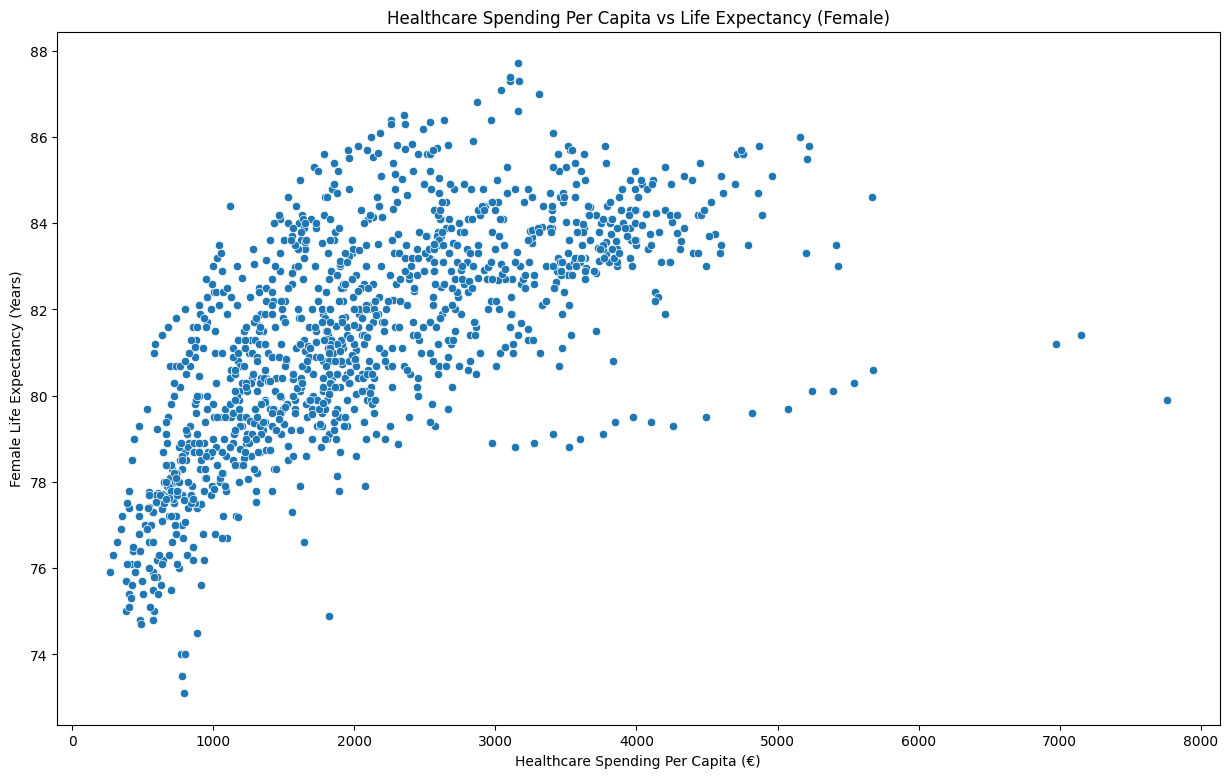

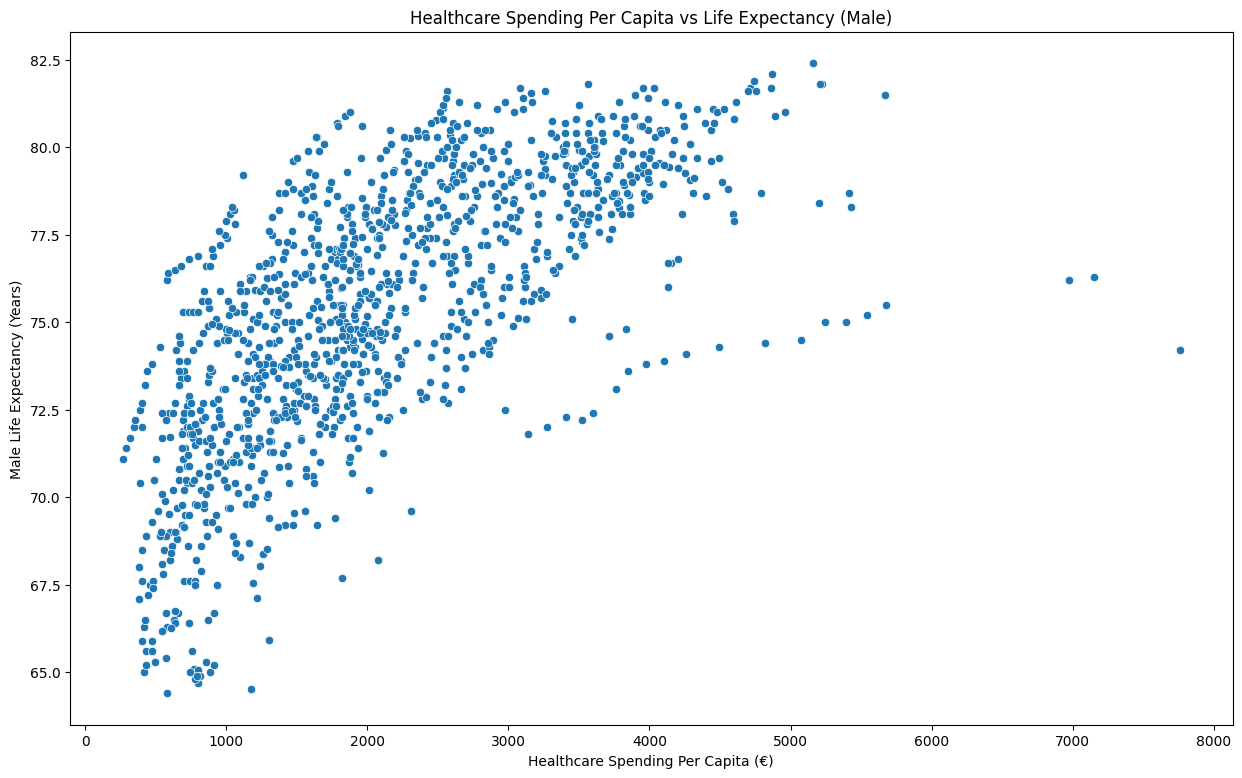

In [260]:
# First Exploratory Data Analysis
plt.figure(figsize=(15, 9))
sns.scatterplot(data=ml_df, x='Healthcare_Spending_Per_Capita', y="Life_Expectancy_Female")
plt.title('Healthcare Spending Per Capita vs Life Expectancy (Female)')
plt.xlabel('Healthcare Spending Per Capita (€)')
plt.ylabel('Female Life Expectancy (Years)')                              
plt.show()


plt.figure(figsize=(15, 9))
sns.scatterplot(data=ml_df, x='Healthcare_Spending_Per_Capita', y="Life_Expectancy_Male")
plt.title('Healthcare Spending Per Capita vs Life Expectancy (Male)')
plt.xlabel('Healthcare Spending Per Capita (€)')
plt.ylabel('Male Life Expectancy (Years)')      
plt.show()

In [261]:
# filtering for efficient/inefficient countries based on life expectancy and healthcare spending

# Inefficient outliers
inefficient_female = (ml_df['Healthcare_Spending_Per_Capita'] > 5000) & (ml_df['Life_Expectancy_Female'] < 82)
inefficient_male = (ml_df['Healthcare_Spending_Per_Capita'] > 5000) & (ml_df['Life_Expectancy_Male'] < 77.5)

# Efficient outliers  
efficient_female = (ml_df['Healthcare_Spending_Per_Capita'] < 3000) & (ml_df['Life_Expectancy_Female'] > 85)
efficient_male = (ml_df['Healthcare_Spending_Per_Capita'] < 2000) & (ml_df['Life_Expectancy_Male'] > 80)

print("Inefficient Countries (Females):", ml_df[inefficient_female]['Country'].unique())
print("Efficient Countries (Females):", ml_df[efficient_female]['Country'].unique())

print("Inefficient Countries (Males):", ml_df[inefficient_male]['Country'].unique())
print("Efficient Countries (Males):", ml_df[efficient_male]['Country'].unique())

Inefficient Countries (Females): ['USA']
Efficient Countries (Females): ['ESP' 'ITA' 'JPN' 'KOR']
Inefficient Countries (Males): ['USA']
Efficient Countries (Males): ['ISR']


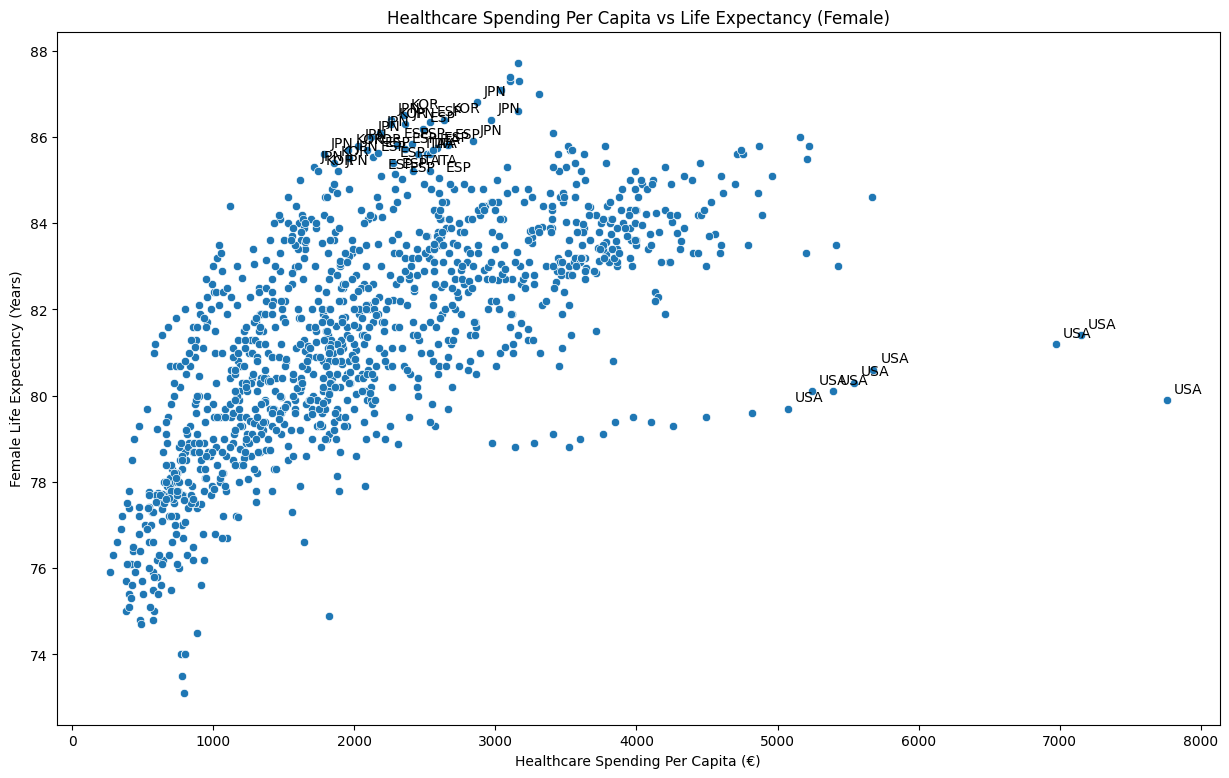

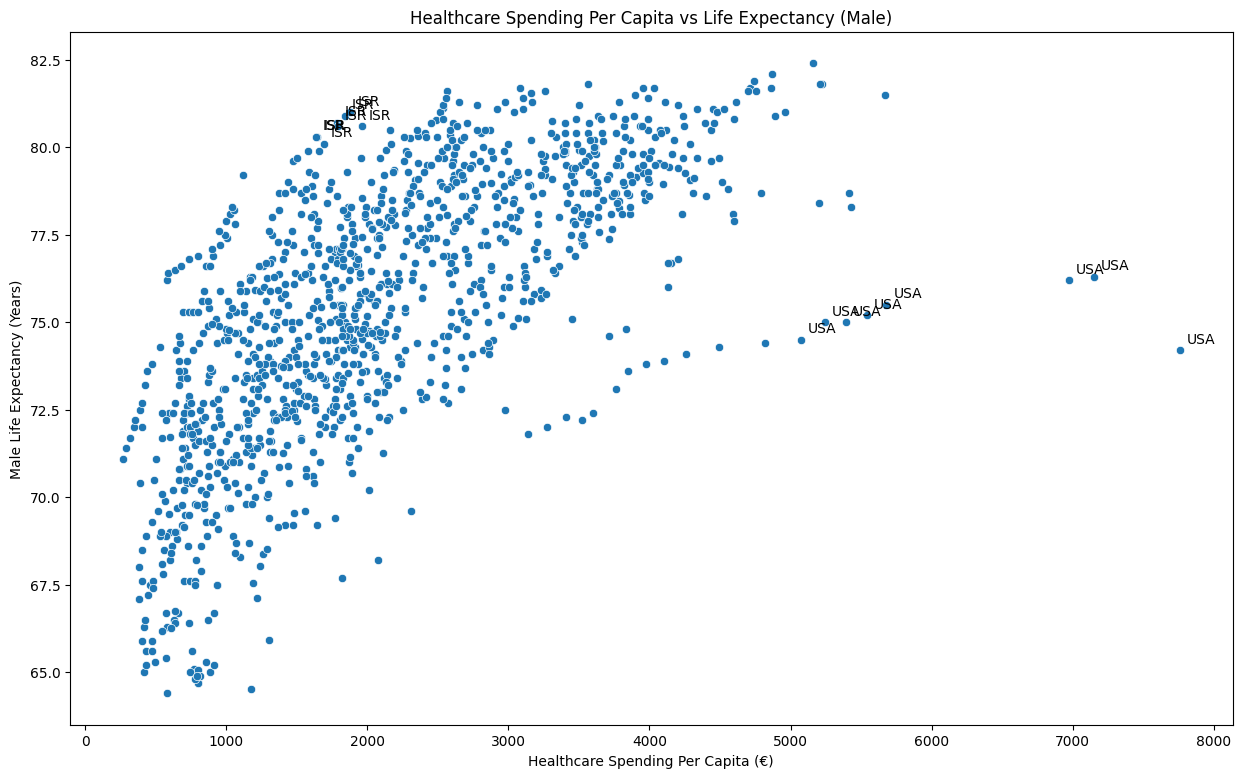

In [264]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=ml_df, x='Healthcare_Spending_Per_Capita', y="Life_Expectancy_Female")
plt.title('Healthcare Spending Per Capita vs Life Expectancy (Female)')
plt.xlabel('Healthcare Spending Per Capita (€)')
plt.ylabel('Female Life Expectancy (Years)')

outliers_to_label_female = ml_df[inefficient_female | efficient_female]
for i, row in outliers_to_label_female.iterrows():
    plt.annotate(row['Country'], (row['Healthcare_Spending_Per_Capita'], row['Life_Expectancy_Female']), xytext=(5, 5), textcoords='offset points')   
                                 
plt.show()


plt.figure(figsize=(15, 9))
sns.scatterplot(data=ml_df, x='Healthcare_Spending_Per_Capita', y="Life_Expectancy_Male")
plt.title('Healthcare Spending Per Capita vs Life Expectancy (Male)')
plt.xlabel('Healthcare Spending Per Capita (€)')
plt.ylabel('Male Life Expectancy (Years)')

outliers_to_label_male = ml_df[inefficient_male | efficient_male]
for i, row in outliers_to_label_male.iterrows():
    plt.annotate(row['Country'], (row['Healthcare_Spending_Per_Capita'], row['Life_Expectancy_Male']), xytext=(5, 5), textcoords='offset points')   
          
plt.show()

/var/folders/2d/lvkbllz16tx46w46hjkg1gdw0000gn/T/ipykernel_80008/552006791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df[inefficient_male]['Country'] = "USA"
